**14. Implement a classification/ logistic regression problem.**

In [1]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

*Sample datasets that may be used for regression:*

        'load_boston'

*Sample datasets that may be used for logistic regression/classification:*

        'load_breast_cancer',
        'load_diabetes',
        'load_digits',
        'load_iris',
        'load_wine'





In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.datasets import *

##  <font color = 'red'> **Dataset 1: Iris Dataset** </font>

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target

# For Binary Classification, let us consider only two classes 0 and 1.

iris_df = iris_df[ (iris_df['target'] == 0) | (iris_df['target'] == 1) ]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


## **STEP 0: DATA EXPLORATION**

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\SARGAM\AppData\Local\Temp\ipykernel_19252\3556531095.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  iris_df.hist(ax=ax, layout=(1,5), alpha=0.5);


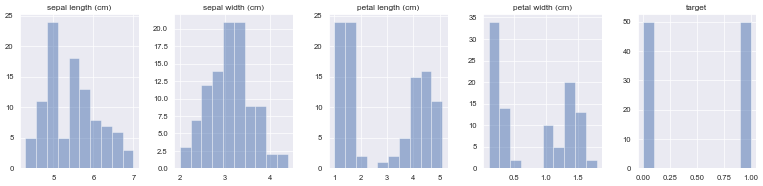

In [54]:
fig, ax = plt.subplots(figsize=(19,4), dpi=50);
iris_df.hist(ax=ax, layout=(1,5), alpha=0.5);

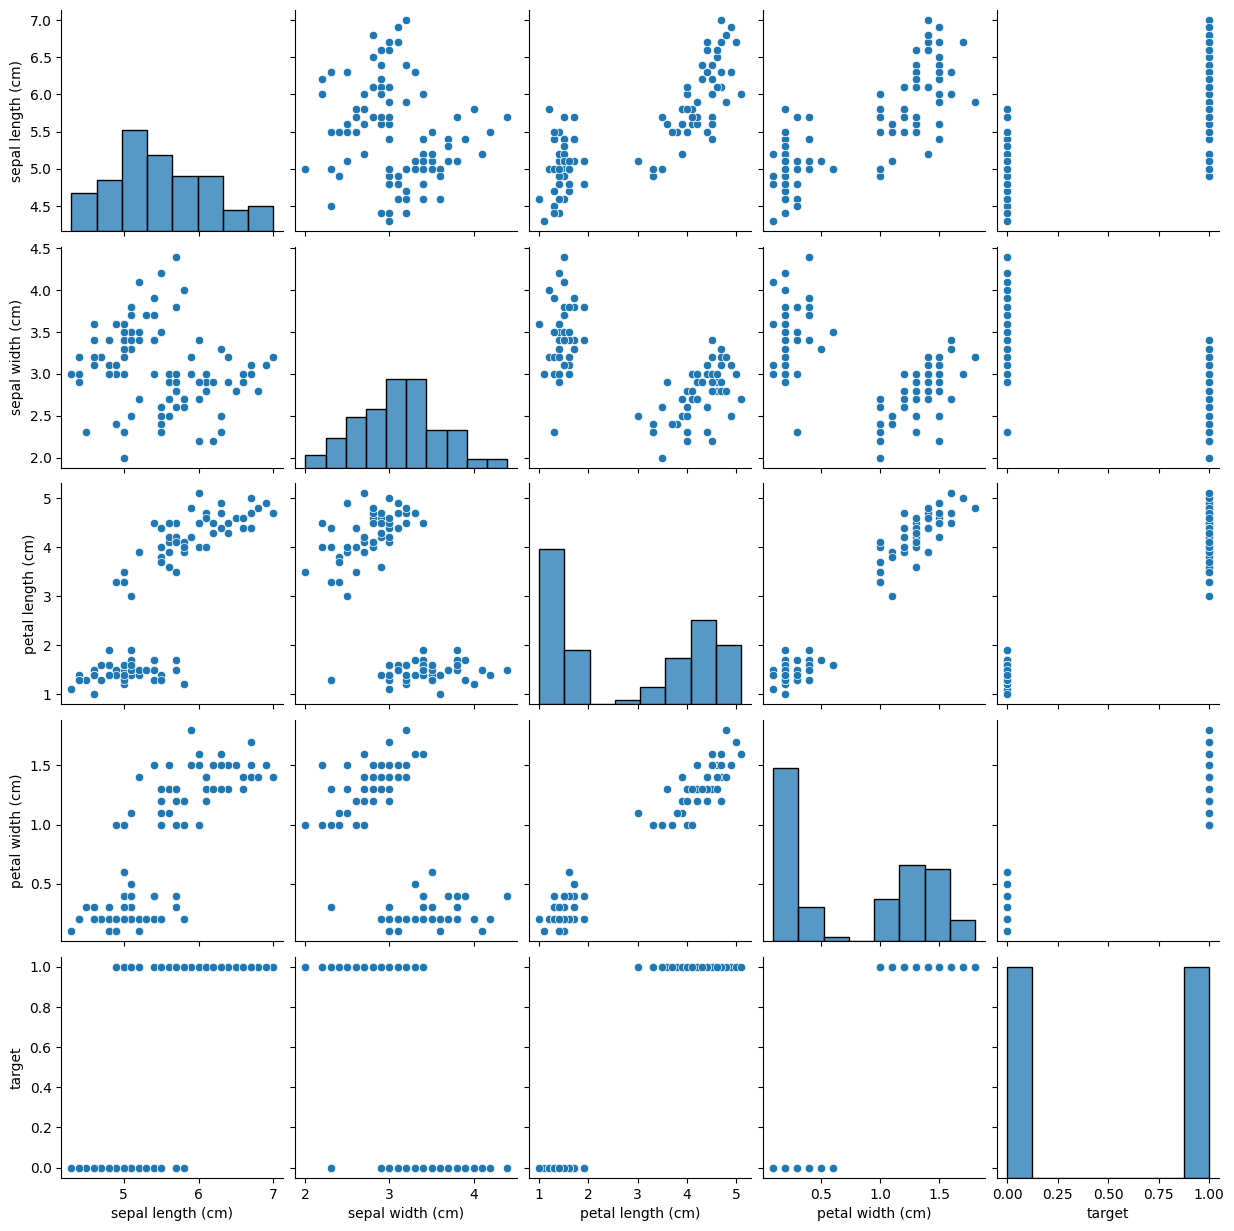

In [7]:
sns.pairplot(iris_df)

<Axes: >

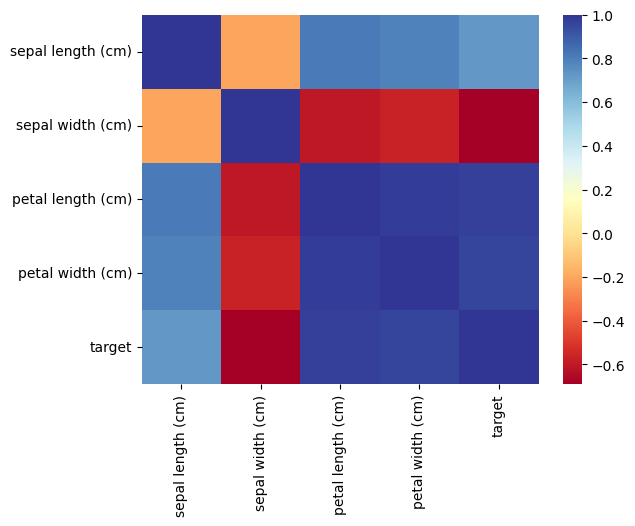

In [8]:
sns.heatmap(iris_df.corr(), cmap='RdYlBu')

## **STEP 1: PRE-PROCESSING**
REMOVING NULL-VALUES AND OUTLIERS

**1. Determing null values**

In [9]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**2. Determining Outliers**

<Axes: >

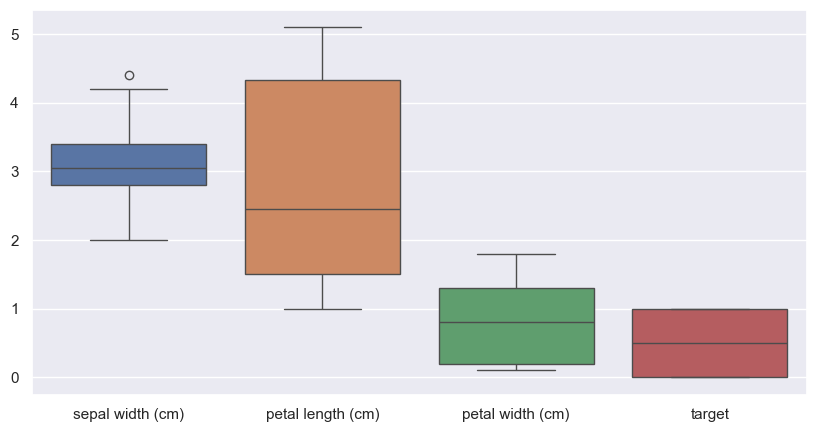

In [59]:
sns.set(rc={'figure.figsize':(1,5)})
sns.boxplot(data=iris_df.iloc[:,1:])

## **STEP 2: TRAIN-TEST SPLIT and Feature Scaling (Part of Pre-processing)**

In [12]:
features =  ['petal length (cm)',	'petal width (cm)']
X = iris_df[features].values
Y = iris_df['target'].values

**FEATURE SCALING/ Standardization/ Normalization**

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize(X):
        print("Mean and Standard Deviation Before")
        print(X.mean(axis=0), X.std(axis=0))

        #**********************************************
        ##### Standardize X part [feature wise scaling!!!!!]
        ##### and ensure that resultant data has mean around 0 and standard deviation 1 !!!
        sc=StandardScaler()
        XScaled = sc.fit_transform(X)
        #**********************************************

        print("Mean and Standard Deviation After")
        print(XScaled.mean(axis=0).round(4), XScaled.std(axis=0))
        return XScaled

XScaled = normalize(X)

Mean and Standard Deviation Before
[2.861 0.786] [1.44228257 0.56232019]
Mean and Standard Deviation After
[-0.  0.] [1. 1.]


**Train-Test Split**

In [14]:
from sklearn.model_selection import train_test_split

def splitTrainTest(X, Y, seed):
        #***************************************************************
        ######### SPLIT THE """"""XScaled""""""" AND """"""" Y """"""" into trainining and test partitions with 80%-20%split
        #<Fix a random state so that same partition is generated everytime>
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
        #****************************************************************
        print("Dimensions of Original Data:")
        print("Size(X):", X.shape, "; Size(Y)", Y.shape)
        print("Dimensions of Training Data:")
        print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
        print("Dimensions of Test Data:")
        print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)
        return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = splitTrainTest(XScaled, Y, seed=2)

Dimensions of Original Data:
Size(X): (100, 2) ; Size(Y) (100,)
Dimensions of Training Data:
Size(X_train): (80, 2) ; Size(Y_train) (80,)
Dimensions of Test Data:
Size(X_test): (20, 2) ; Size(Y_test) (20,)


## **STEP 3: FITTING LOGISTIC REGRESSION MODEL ON TRAINING DATA**

### <font color='red'>**3.1 BI-VARIABLE LINEAR REGRESSION**</font>

Text(0, 0.5, 'Petal Width')

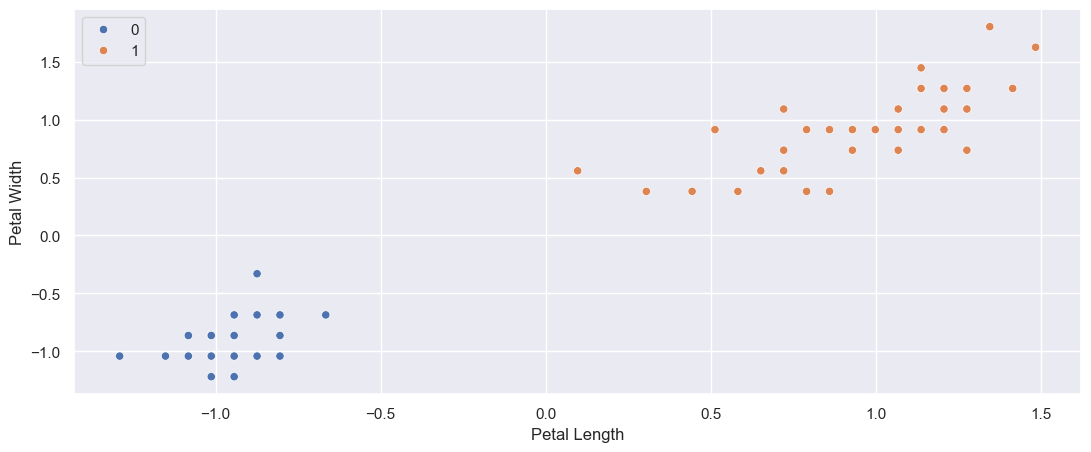

In [15]:
X = X_train
Y = Y_train
sns.scatterplot(x = X[:,0], y = X[:,1], hue=Y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

### <font color='blue'> **GRADIENT DESCENT METHOD FOR LOGISTIC REGRESSION** </font>

In [60]:

def sigmoid(z):
    return 1/(1 + 1/(math.e**z))

def computeCost(X, Y, b, w1, w2):
    #### Compute cost J
    N=X.shape[0]
    z = w1*X[:,0] + w2*X[:,1] + b
    f_x = sigmoid(z)
    lossL = (Y*np.log(f_x) + (1-Y)*np.log(1-f_x))
    costJ = (-1/N) * np.sum( lossL )
    return costJ

def gradientDescent (X, Y, learningRate, numIterations):
    N, d = X.shape
    b, w1, w2 = 0,0,0
    errorList =[] ### Store cost in each iteration
    for i in range(numIterations):

        z = w1*X[:,0] + w2*X[:,1] + b
        f_x = sigmoid(z)  #COMPUTE f(X)

        ### compute updated w's and b ##################3

        deltaJb = 1/N * np.sum(f_x - Y)
        deltaJw1 = 1/N * np.sum((f_x - Y)*X[:,0])
        deltaJw2 = 1/N * np.sum((f_x - Y)*X[:,1])

        #Updating bias
        b = b - learningRate * deltaJb
        #Updating weights
        w1 = w1 - learningRate * deltaJw1
        w2 = w2 - learningRate* deltaJw2

        costJ = computeCost(X, Y, b, w1, w2)
        errorList.append(costJ)
        # Plot iteration vs error
    plt.plot(range(numIterations), errorList)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    return b, w1, w2

**Case 1: Using very low learning rate, say alpha=0.0001**

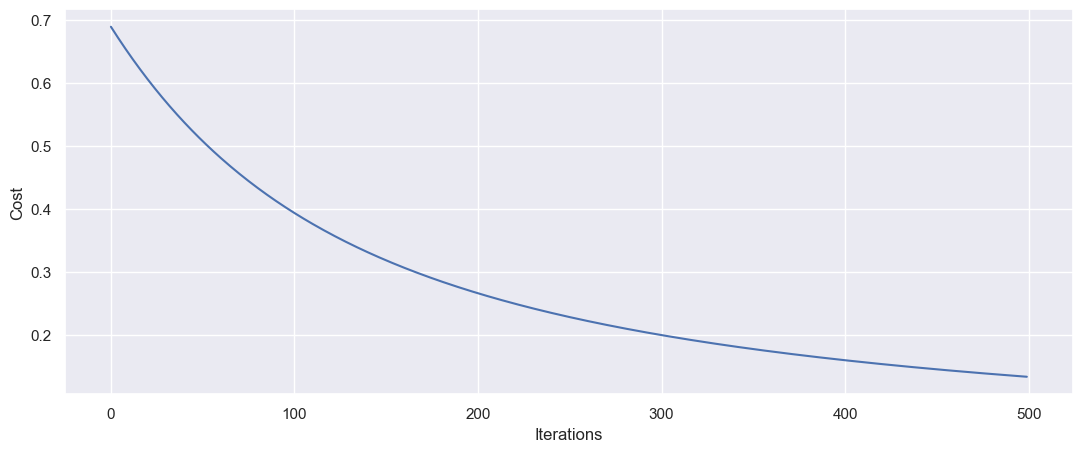

0.07756725962742271 1.082318775390911 1.0605866607905676


In [17]:
b, w1, w2 = gradientDescent(X, Y, 0.01, numIterations=500)
print(b,w1,w2)
# Match w and b against the ones obtained in A and B part

**Case 2: Using very high learning rate, say alpha=0.1**

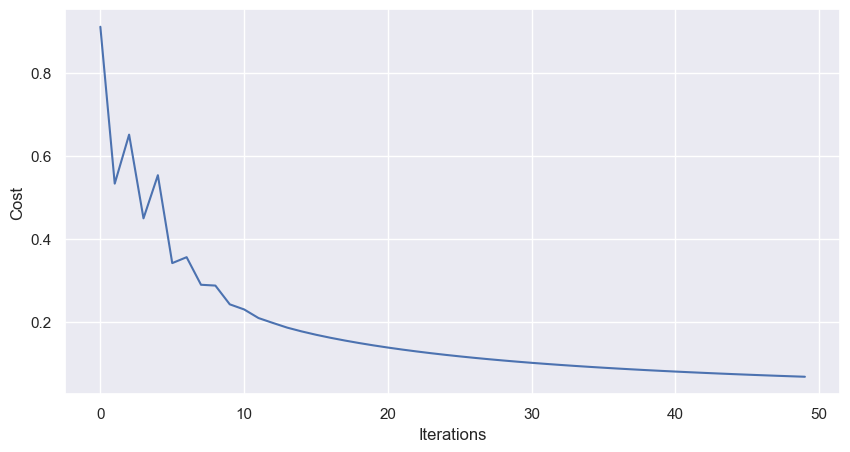

-4.90310591204316 1.3726534744153287 2.0630447248314563


In [63]:
b, w1, w2 = gradientDescent(X, Y, 1.5, numIterations=50)
print(b,w1,w2)

### <font color='blue'> **Plotting Decision Boundary** </font>

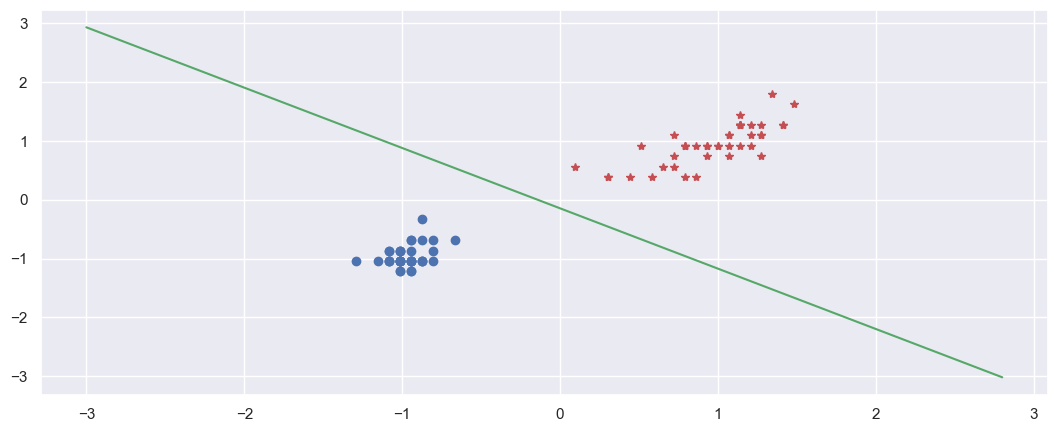

In [19]:
def plotDecisionBoundary(X_train, Y_train, w1, w2, b):
        plt.plot(X_train[Y_train==0,0], X_train[Y_train==0,1], 'bo')
        plt.plot(X_train[Y_train==1,0], X_train[Y_train==1,1], 'r*')
        x=np.arange(-3,3,0.2)
        y=-(w1*x + b)/w2    #set w1.x1+w2.x2+b = 0 or w1.x+w2.y+b = 0
        plt.plot(x,y,'g-')
plotDecisionBoundary(X_train, Y_train, w1, w2, b)

## **STEP 4:Evaluating Performance of Model**

In [65]:
def evaluatePerformance(X, Y, b, w1, w2):
    z = w1*X[:,0] + w2*X[:,1] + b
    f_x = sigmoid(z)
    Y_pred = np.where(f_x > 0.5, 1, 0)
    acc = np.mean(Y_pred == Y)
    return acc * 100, 
testAccuracy = evaluatePerformance(X_test, Y_test, b, w1, w2)
print("Test Accuracy", testAccuracy)
trainAccuracy = evaluatePerformance(X_train, Y_train, b, w1, w2)
print("Train Accuracy", trainAccuracy)


Test Accuracy (70.0,)
Train Accuracy (48.75,)


#<font color='red'>**COMPLETE PROGRAM**</font>

### <font color='red'>**LOGISTIC REGRESSION USING OUR OWN IMPLEMENTATION OF LOGISTIC REGRESSION**</font>

*************Normalization/Standardization*************
Mean and Standard Deviation Before
[2.861 0.786] [1.44228257 0.56232019]
Mean and Standard Deviation After
[-0.  0.] [1. 1.]
*************Train-Test Split*************
Dimensions of Original Data:
Size(X): (100, 2) ; Size(Y) (100,)
Dimensions of Training Data:
Size(X_train): (80, 2) ; Size(Y_train) (80,)
Dimensions of Test Data:
Size(X_test): (20, 2) ; Size(Y_test) (20,)
*************Learning/Fitting the model on training partition*************


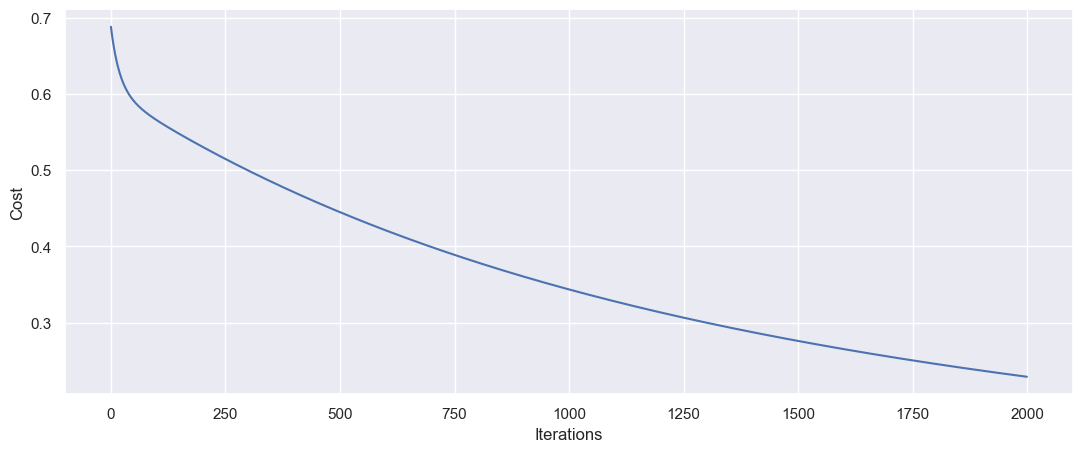


 Parameters Learned: (b, w1, w2) (-2.2319151479635457, 0.722733278333724, 0.986191430657805) 

*************Plotting decision boundary*************


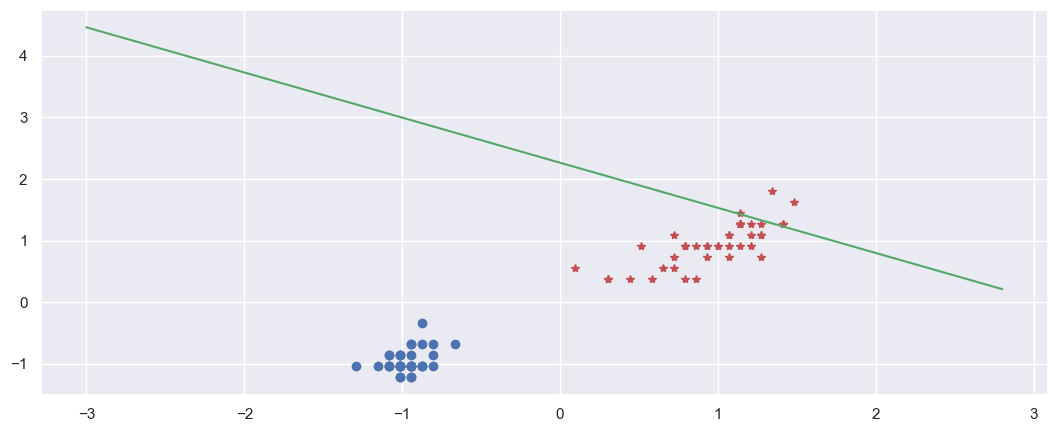

*************Evaluating performance of trained model on test partition*************
Test Accuracy (75.0, array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Train Accuracy (52.5, array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))


In [21]:
#Choose any of the following two feature sets
features =  ['sepal length (cm)',	'sepal width (cm)']
#>>>>>>>>>>>>>>>>>>>>>>>>>> OR <<<<<<<<<<<<<<<<<<<<<<<
features =  ['petal length (cm)',	'petal width (cm)']
X = iris_df[features].values
Y = iris_df['target'].values

print("*************Normalization/Standardization*************")
XScaled = normalize(X)

print("*************Train-Test Split*************")
X_train, X_test, Y_train, Y_test = splitTrainTest(XScaled, Y, seed=2)

print("*************Learning/Fitting the model on training partition*************")
b, w1, w2 = gradientDescent(X, Y, 0.009, numIterations=2000)

print("\n Parameters Learned: (b, w1, w2)", (b, w1, w2),"\n")

print("*************Plotting decision boundary*************")
plotDecisionBoundary(X_train, Y_train, w1, w2, b)
plt.show()

print("*************Evaluating performance of trained model on test partition*************")
testAccuracy = evaluatePerformance(X_test, Y_test, b, w1, w2)
print("Test Accuracy", testAccuracy)
trainAccuracy = evaluatePerformance(X_train, Y_train, b, w1, w2)
print("Train Accuracy", trainAccuracy)

### <font color='red'>**LOGISTIC REGRESSION USING PRE-DEFINED LogisticRegression Class**</font>

In [22]:
import numpy
intArray =numpy.array([[34,43,73],[82,22,12],[53,94,66]])

*************Normalization/Standardization*************
Mean and Standard Deviation Before
[2.861 0.786] [1.44228257 0.56232019]
Mean and Standard Deviation After
[-0.  0.] [1. 1.]
*************Train-Test Split*************
Dimensions of Original Data:
Size(X): (100, 2) ; Size(Y) (100,)
Dimensions of Training Data:
Size(X_train): (80, 2) ; Size(Y_train) (80,)
Dimensions of Test Data:
Size(X_test): (20, 2) ; Size(Y_test) (20,)
*************Learning/Fitting the model on training partition*************

 Parameters Learned: (b, w1, w2) (0.3923659378040839, 2.009672447558487, 1.9363759646210745) 

*************Plotting decision boundary*************


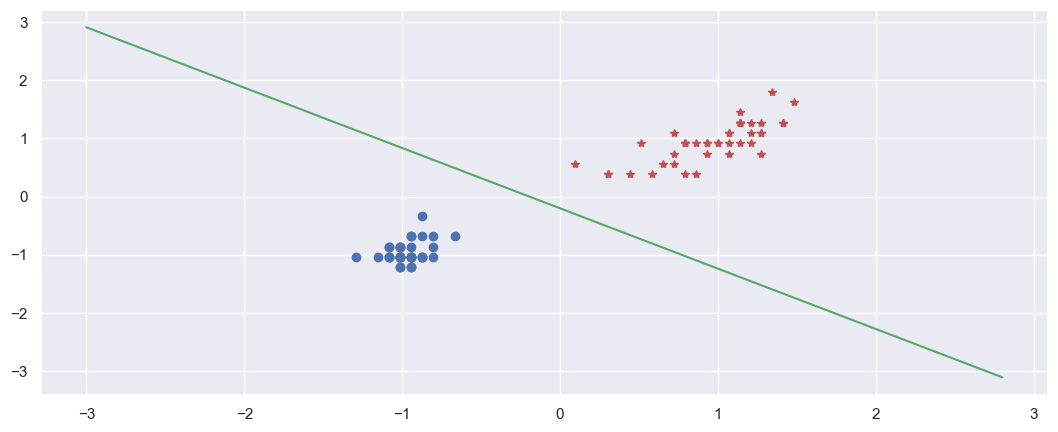

*************Evaluating performance of trained model on test partition*************
Test Accuracy 100.0
Train Accuracy 100.0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Choose any of the following two feature sets
features =  ['sepal length (cm)',	'sepal width (cm)']
#>>>>>>>>>>>>>>>>>>>>>>>>>> OR <<<<<<<<<<<<<<<<<<<<<<<
features =  ['petal length (cm)',	'petal width (cm)']
X = iris_df[features].values
Y = iris_df['target'].values
print("*************Normalization/Standardization*************")
XScaled = normalize(X)
print("*************Train-Test Split*************")
X_train, X_test, Y_train, Y_test = splitTrainTest(XScaled, Y, seed=2)
print("*************Learning/Fitting the model on training partition*************")
LRModel = LogisticRegression()
LRModel.fit(X_train, Y_train)
w1,w2= LRModel.coef_[0]
b=LRModel.intercept_[0]
print("\n Parameters Learned: (b, w1, w2)", (b, w1, w2),"\n")
print("*************Plotting decision boundary*************")
plotDecisionBoundary(X_train, Y_train, w1, w2, b)
plt.show()
print("*************Evaluating performance of trained model on test partition*************")
Y_testPred = LRModel.predict(X_test)
testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
print("Test Accuracy", testAccuracy*100)
Y_trainPred = LRModel.predict(X_train)
trainAccuracy = metrics.accuracy_score(Y_train, Y_trainPred)
print("Train Accuracy", trainAccuracy*100)

In [24]:
import seaborn
help(seaborn.get_dataset_names)

Help on function get_dataset_names in module seaborn.utils:

get_dataset_names()
    Report available example datasets, useful for reporting issues.
    
    Requires an internet connection.



In [25]:
seaborn.load_dataset('penguins').tail(150)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
194,Chinstrap,Dream,50.9,19.1,196.0,3550.0,Male
195,Chinstrap,Dream,45.5,17.0,196.0,3500.0,Female
196,Chinstrap,Dream,50.9,17.9,196.0,3675.0,Female
197,Chinstrap,Dream,50.8,18.5,201.0,4450.0,Male
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [26]:
df = seaborn.load_dataset('mpg')

In [27]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [28]:
from sklearn import datasets

In [29]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
irisDf = pd.DataFrame(data = iris.data , columns = iris.feature_names)

In [31]:
irisDf['target_names'] = iris.target

In [32]:
irisDf['target_names'].replace([0,1,2],iris.target_names,inplace = True)

In [33]:
irisDf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
x = irisDf.iloc[:,0:4]
y = irisDf.target_names

In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [36]:
sc = StandardScaler()

In [37]:
x = sc.fit_transform(x)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)

In [39]:
model = LogisticRegression()

In [40]:
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(x_test)
y_pred

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica'], dtype=object)

In [42]:
((y_pred == y_test).sum() * 100) / len(y_pred)

96.66666666666667

In [43]:
testAccuracy = metrics.accuracy_score(y_test,y_pred)

In [44]:
testAccuracy

0.9666666666666667

In [45]:
report  = classification_report(y_test,y_pred,output_dict = True, target_names = ['setosa','versicolor','virginica'])

In [46]:
report

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0},
 'versicolor': {'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1-score': 0.9090909090909091,
  'support': 6.0},
 'virginica': {'precision': 0.9285714285714286,
  'recall': 1.0,
  'f1-score': 0.962962962962963,
  'support': 13.0},
 'accuracy': 0.9666666666666667,
 'macro avg': {'precision': 0.9761904761904763,
  'recall': 0.9444444444444445,
  'f1-score': 0.957351290684624,
  'support': 30.0},
 'weighted avg': {'precision': 0.9690476190476189,
  'recall': 0.9666666666666667,
  'f1-score': 0.9657687991021324,
  'support': 30.0}}

In [47]:
metrics.confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

In [48]:
reportDf = pd.DataFrame(report)
reportDf

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.928571,0.966667,0.976190,0.969048
recall,1.0,0.833333,1.000000,0.966667,0.944444,0.966667
f1-score,1.0,0.909091,0.962963,0.966667,0.957351,0.965769
support,11.0,6.000000,13.000000,0.966667,30.000000,30.000000


<Axes: >

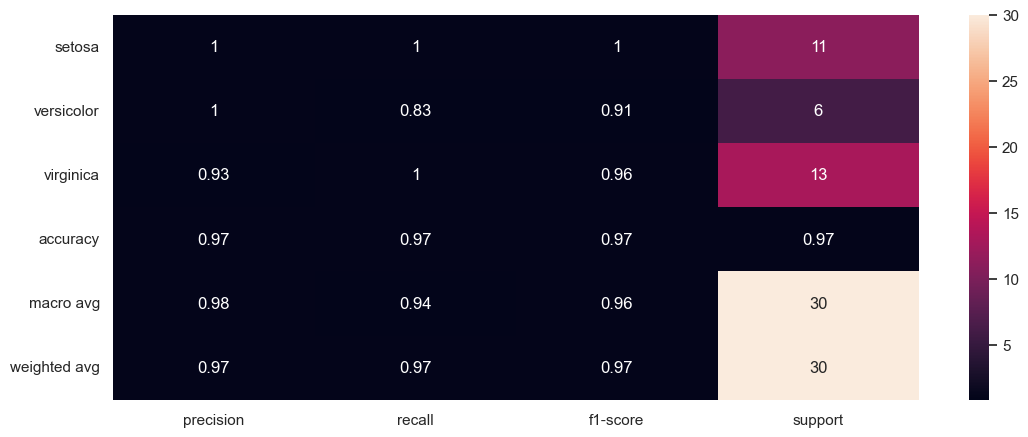

In [49]:
sns.heatmap(reportDf.T,annot = True)

In [50]:
# stratified kFold classification

skf = StratifiedKFold(n_splits = 5)

In [51]:
sumTestAccuracy = 0
for train_index,test_index in skf.split(x,y):
    xTrain = x[train_index]
    yTrain = y[train_index]
    xTest = x[test_index]
    yTest = y[test_index]
    model.fit(xTrain,yTrain)
    yPred =  model.predict(xTest)
    test_Accuracy = metrics.accuracy_score(yTest,yPred)
    sumTestAccuracy += test_Accuracy
print(sumTestAccuracy/5)

0.9600000000000002


[Text(0.5, 0.9166666666666666, 'petal width (cm) <= -0.526\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 0.725\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 0.678\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 0.593\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 0.462\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'petal length (cm) <= 0.962\ngini = 0.444\nsample

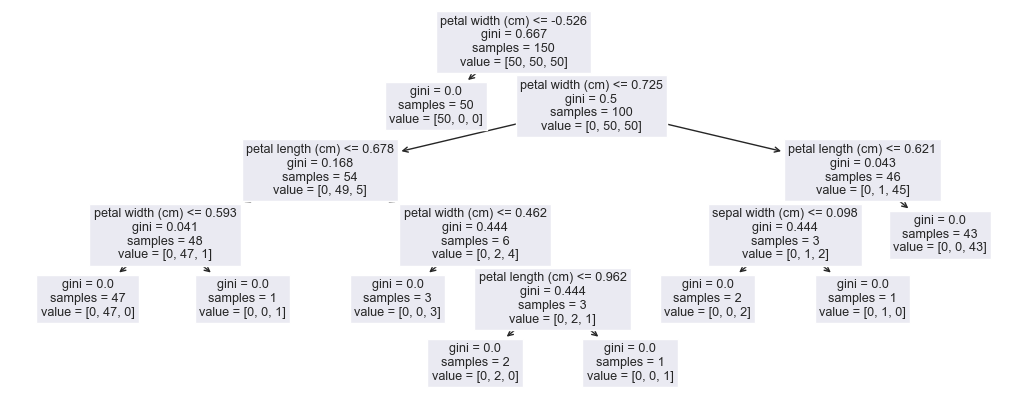

In [52]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x,y)
tree.plot_tree(dtree,feature_names = iris.feature_names)